<a href="https://colab.research.google.com/github/AllanLinhares/pdi-ceo-diagnosis/blob/master/notebooks/PDI_carcinoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DevPlan - Replicação:
  1. Pré-processamento dos dados

    1.1. Baixar dataset
    1.2. Organizar imagens em labels (Câncer do endométrio = 1; Não cancerígeno = 0)
    1.3. Converter imagens para os oito esquemas de cores a serem analisados
    ["RGB", "LUV", "Grayscale", "XYZ", "HLS", "YCrCb", "HSV", "LAB"]

  2. Extração de características
    
    2.1. Aplicação da técnica Radiomics para extração de características das imagens
    Categorias e quantidades de características extraídas no artigo foram:
    {"First Order": 16,
    "Gray Level Co-occurrence Matrix (GLCM)": 24,
    "Gray Level Dependence Matrix (GLDM)": 14,
    "Gray Level Run Length Matrix (GLRLM)": 16,
    "Gray Level Size Zone Matrix (GLSZM)": 16,
    "Neighboring Gray Tone Difference Matrix (NGTDM)": 5}

    2.2. Aplicar I-RFE para seleção das principais características para classificação do câncer de ovário
    2.3. Utilizar o F1-score paradeterminar o ponto ideal de eliminaçào das características.
    Caso o valor piore, a eliminação de características deve ser interrompida.

  3. Classificação

    3.1. Validação cruzada.
    3.2. Aplicação de algoritmos de aprendizagem de máquina:
    ["SVM",
    "RF",
    "KNN",
    "XGB",
    "ADA"].
    Fazer isso para todos os 8 esquemas de cores.

  4. Avaliação dos resultados

    4.1. Avaliação do resultado com as métricas:
    ["Acurácia[ACC]",
    "Especificidade[ESP]",
    "Sensibilidade[SEN]",
    "Precisão[PRE]",
    "F1-Score",
    "Kappa",
    "AUC-ROC"]

  5. Experimentos


    Utilizar validação cruzada com k-fold = 5 e os hiperparâmetros padrões da biblioteca scikit-learn.

    5.1. Experimento 1:
    Radiomics
    RGB
    Sem I-RFE
    Todos os classificadores

    5.2. Experimento 2:
    Radiomics
    Todos os esquemas de cores
    Sem I-RFE
    Todos os classificadores
    Printar tabela com o melhor classificador de cada esquema de cor

    5.3. Experimento 3:
    Radiomics
    Todos os esquemas de cores
    Com I-RFE
    Todos os classificadores
    Printar tabela com o melhor classificador de cada esquema de cor

    5.4. Experimento 4:
    Comparaçào do melhor resultado versus CNNs.
    Treinamento das CNNs:
      1 - Imagens originais fornecidas como entrada
      2 - Utilização de 3 arquiteturas de CNNs:
      ["VGG-16",
      "ResNet-50",
      "InceptionV3"]
      com pesos pré-treinados.
      3 - Otimizador Adam com hiperparâmetros padrão, com entropia cruzada como funçào de perda e 30 épocas.
      4 - Hold-out 80/20





#DevPlan - Expansão:

  1. Vision transformer

  2. Aumentar base
    
    Opções:
    2.1. Aquisição de novas imagens
      1- Buscar imagens em outros bancos de dados
      2- Aplicar técnicas de padronização da coloração (ex: Stain normalization)
      3- Implementar filtros para remover imagens com baixa resolusão ou artefatos
    2.2. Aumento dos dados
      1 - transformações geométricas
      2 - adicionar ruído gaussiano ou desfoque
    2.3. Geração sintética com IA

  3. Expandir para outros cânceres

In [ ]:
#Baixando o dataset
import kagglehub

download_path = kagglehub.dataset_download("bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology")

Using Colab cache for faster access to the 'ovarian-cancer-and-subtypes-dataset-histopathology' dataset.


In [ ]:
#Caminhos apenas as subpastas interessadas (Endometrio e Não cancerígeno)
import os

contentsPath = os.listdir(download_path) #/OvarianCancer
contentsPath = os.path.join(download_path, 'OvarianCancer') #bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology/OvarianCancer

endometriPath = os.path.join(contentsPath, 'Endometri') #bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology/OvarianCancer/Endometri
nonCancerousPath = os.path.join(contentsPath, 'Non_Cancerous') #bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology/OvarianCancer/Non_Cancerous

In [ ]:
#Salvando as images no array (98 imagens de endometrio, 100 não cancerígenas)
from PIL import Image
import numpy as np

label = []
imagesEndometri = []
for imgName in os.listdir(endometriPath): #Não garante ordem dos arquivos
    if imgName.lower().endswith(".jpg"):
        imgPath = os.path.join(endometriPath, imgName)
        img = Image.open(imgPath).convert("RGB")
        imagesEndometri.append(np.array(img))
        label.append("Positivo")

imagesNonCancerous = []
for imgName in os.listdir(nonCancerousPath): #Não garante ordem dos arquivos
    if imgName.lower().endswith(".jpg"):
        imgPath = os.path.join(nonCancerousPath, imgName)
        img = Image.open(imgPath).convert("RGB")
        imagesNonCancerous.append(np.array(img))
        label.append("Negativo")

imagesTotal = imagesEndometri + imagesNonCancerous

In [ ]:
#Esquema de cores
import cv2

colorSpaces = ["RGB", "LUV", "Grayscale", "XYZ", "HLS", "YCrCb", "HSV", "LAB"] #Esquemas a serem utilizados
colorScheme = {cs: [] for cs in colorSpaces} #Dicionario

for img_rgb in imagesTotal:
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    colorScheme["RGB"].append(img_rgb)

    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    colorScheme["Grayscale"].append(gray)

    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    colorScheme["HSV"].append(hsv)

    hls = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HLS)
    colorScheme["HLS"].append(hls)

    ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    colorScheme["YCrCb"].append(ycrcb)

    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    colorScheme["LAB"].append(lab)

    luv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LUV)
    colorScheme["LUV"].append(luv)

    xyz = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2XYZ)
    colorScheme["XYZ"].append(xyz)

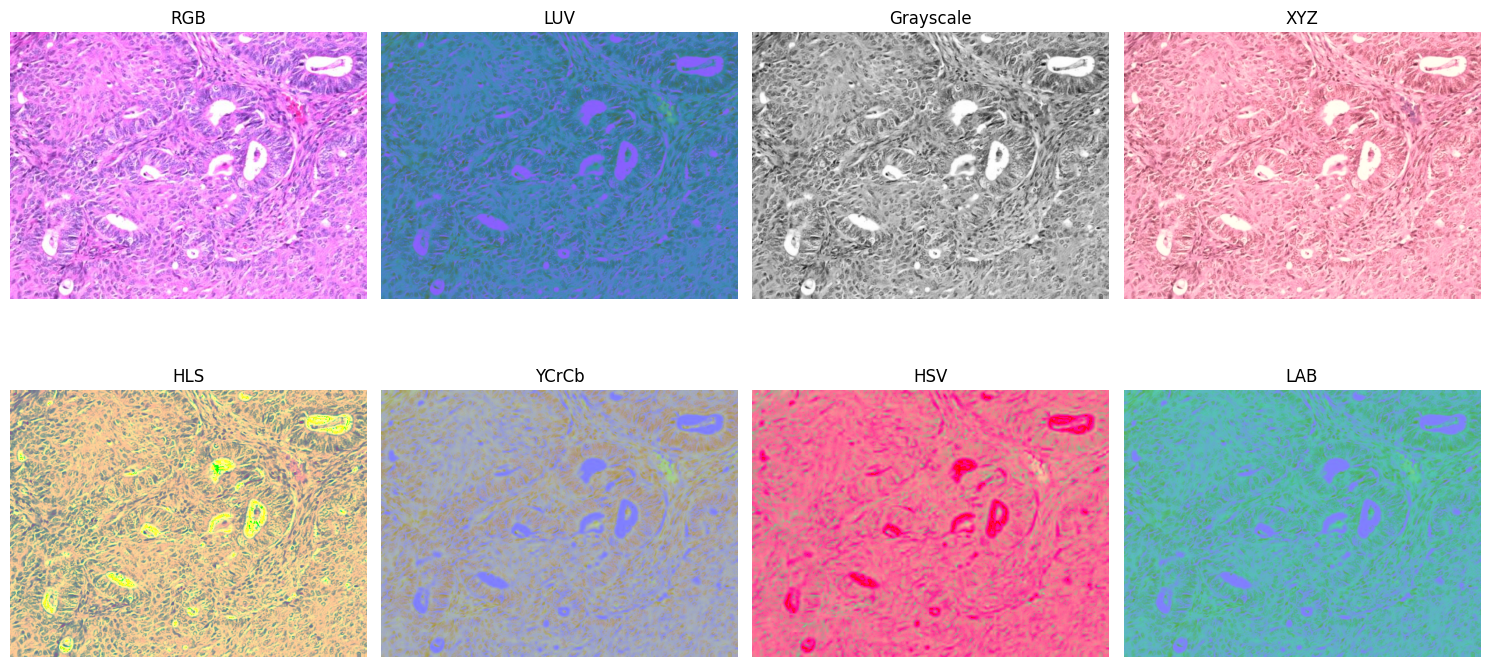

In [ ]:
#Exibindo a primeira imagem em cada esquema de cores
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

for i, cs in enumerate(colorSpaces):
    img = colorScheme[cs][0]

    plt.subplot(2, 4, i+1)

    if cs == "Grayscale":
        plt.imshow(img, cmap='gray')
    elif cs == "RGB":
        plt.imshow(img)
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)

    plt.title(cs)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Extração de características